In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
# Basic Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print(f"Basic GBC Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nFeature Importances:")
feat_imp = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': gbc.feature_importances_
}).sort_values('importance', ascending=False)
print(feat_imp)


Basic GBC Accuracy: 1.000

Feature Importances:
             feature  importance
2  petal length (cm)    0.595202
3   petal width (cm)    0.383604
1   sepal width (cm)    0.017775
0  sepal length (cm)    0.003420


In [3]:
# Parameter grid for optimization
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.3f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best CV accuracy: 0.952


Tuned GBC Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



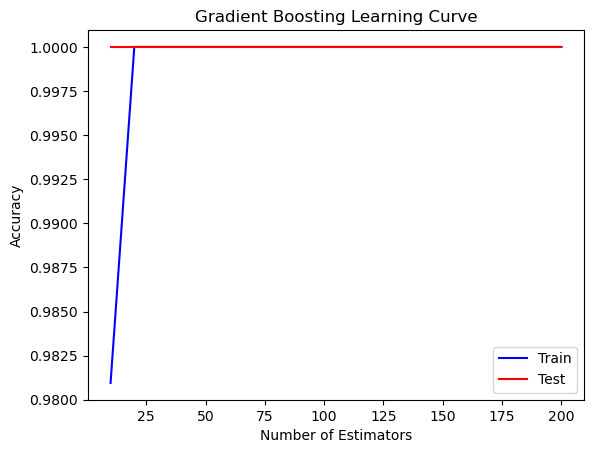

In [4]:
# Best model predictions
best_gbc = grid_search.best_estimator_
y_pred_tuned = best_gbc.predict(X_test)

print(f"Tuned GBC Accuracy: {accuracy_score(y_test, y_pred_tuned):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=iris.target_names))

# Learning curve visualization
train_scores = []
test_scores = []
estimators_range = range(10, 201, 10)

for n_est in estimators_range:
    temp_model = GradientBoostingClassifier(n_estimators=n_est, random_state=42)
    temp_model.fit(X_train, y_train)
    train_scores.append(temp_model.score(X_train, y_train))
    test_scores.append(temp_model.score(X_test, y_test))

plt.plot(estimators_range, train_scores, 'b-', label='Train')
plt.plot(estimators_range, test_scores, 'r-', label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Learning Curve')
plt.legend()
plt.show()
